# Canny边缘检测

# 1. 流程介绍

① Canny边缘检测流程：

- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

# 2. 高斯滤波器

① 高斯滤波器靠近的中心点的权重比较大，较远中心点的权重比较小。

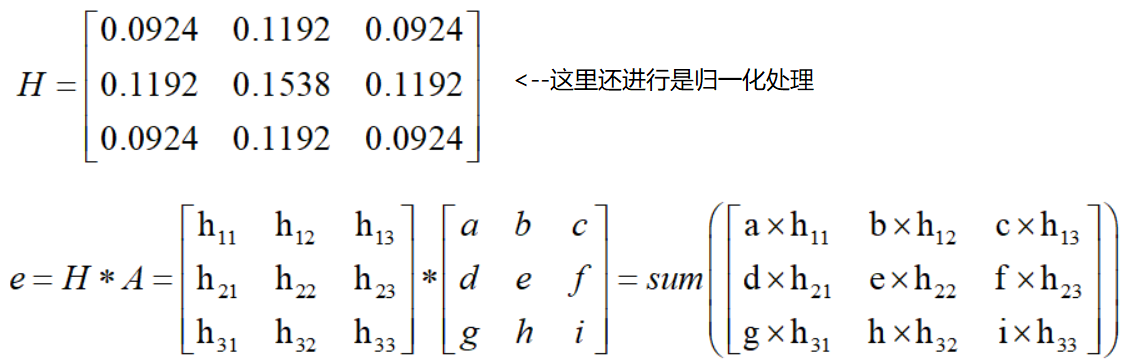

# 3. 梯度和方向

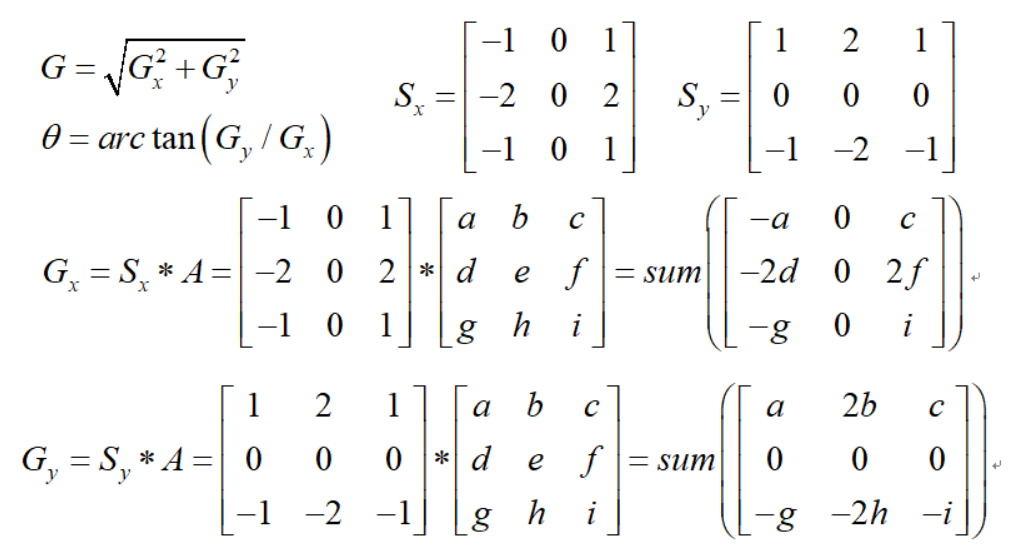

# 4. 非极大值抑制

① C 点的梯度和方向可以通过前一步算出来。

② C 点的梯度是不是一个极大值点，应该是去跟它的临近点去比较。

③ 利用 C 点梯度的方向，可以得到上面有一个交点 Q，下面有一个交点 Z，如果 C 点的梯度比 Q 和 Z 都大，那么 C 就是极大值点，其中 Q 和 Z 的梯度值通过线性差值法来计算。

④ 如果 C 的梯度是极大值点，那么 C 就是边缘点。否则 C 不是极大值点，就会被抑制。

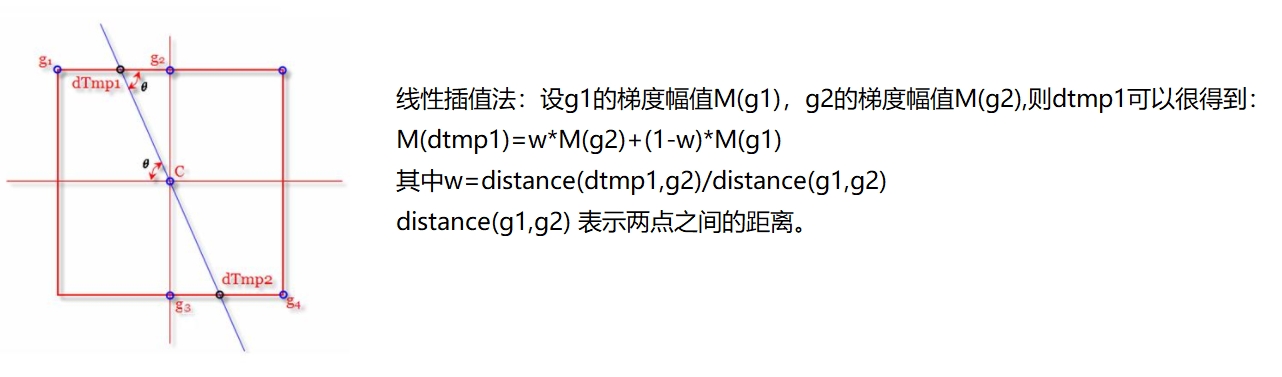

① 简单计算将像素点周围固定为八个像素，当梯度角度相交的点与哪个方向近，就哪个方向的两个点。

② 例如，梯度方向是 43° 就取上下两个像素来做极大值判断，如果梯度方向是 46°，就取左下、右上两个像素来做极大值判断。

③ 如下图所示，如果 A 的梯度值比 B 和 C 都要大，那么 A 就是边界，由于边界与梯度方向垂直，所以如下图所示黑色为边界。

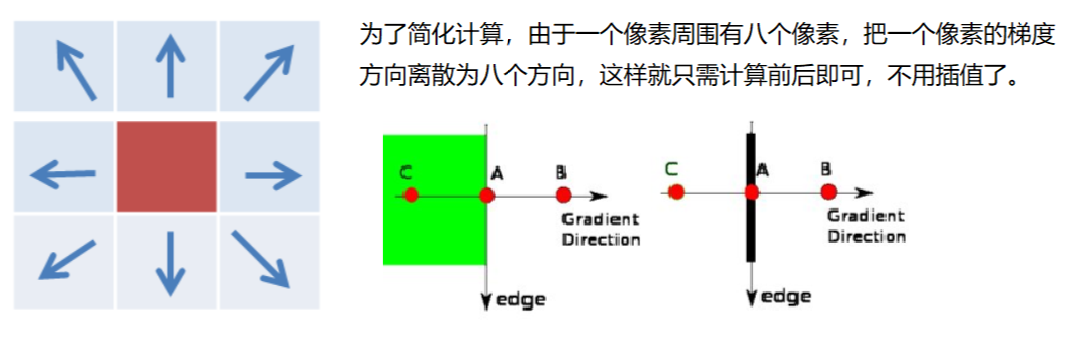

# 5. 双阈值检测

① C 在 minVal 与 maxVal 之间，是候选边界，若 C 的左右或上下两边连有 A，而 A 是边界，那么定义 C 也是边界。

② B 在 minVal 与 maxVal 之间，是候选边界，若B的左右或上下像素都不是边界，那么 B 就被舍弃，不定义为边界。

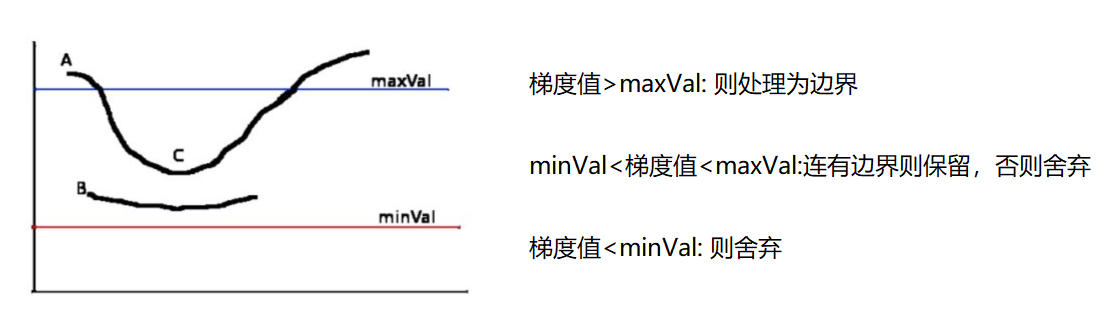

# 6. Canny代码

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline   

In [2]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE) 

v1 = cv2.Canny(img,80,150) # 第二个参数为minVal，第三个参数为maxVal
v2 = cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')

In [3]:
img = cv2.imread('01_Picture/08_Car.png',cv2.IMREAD_GRAYSCALE) 

v1 = cv2.Canny(img,120,250) # 第二个参数为minVal，第三个参数为maxVal
v2 = cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')